# Assignment #13

## Step #1
### Import Pandas and read the data into the dataframe

In [350]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

df = pd.read_csv('agaricus-lepiota.data')

## Step #2
### Next we select our 3 columns and assign them appropriate column names

In [351]:
myDf = df.iloc[:,[0,5,8]]
myDf.columns = ['Poisonous', 'Odor', 'Gill-Size']

## Step #3
### Then we switch the text values to integers

In [352]:

pe = {'e': 1,'p':2}
odor={'a': 1, 'l':2,'c':3,'y':4,'f':5,'m':6,'n':7,'p':8,'s':9}
size={'b':1,'n':2}

myDf['Poisonous'] = myDf['Poisonous'].map(pe)
myDf['Odor'] = myDf['Odor'].map(odor)
myDf['Gill-Size'] = myDf['Gill-Size'].map(size)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pan

## Step #4
### Lastly we display the data in a scatter plot graph

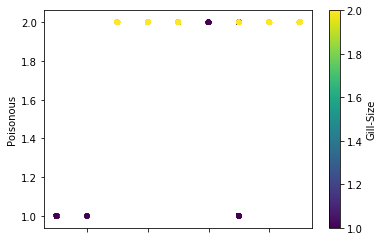

In [353]:
myDf.plot.scatter(x='Odor', y="Poisonous", c='Gill-Size', colormap='viridis')

# Part 2 SciKit analysis

## Step #1
### First we need to use get_dummies() to convert our two columns in to sets of columns for the machine learning to analyze

In [354]:
characteristics = ['Odor', 'Gill-Size']
x = pd.get_dummies(data=myDf, columns=characteristics)
y = x['Poisonous']
x.head()

,Poisonous,Odor_1,Odor_2,Odor_3,Odor_4,Odor_5,Odor_6,Odor_7,Odor_8,Odor_9,Gill-Size_1,Gill-Size_2
0,1,1,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,1,0,0,1
3,1,0,0,0,0,0,0,1,0,0,1,0
4,1,1,0,0,0,0,0,0,0,0,1,0


## Step #2 
## Then we Train, test, split the data. I used the following link as a guide. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [355]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6498, 12)
(6498,)
(1625, 12)
(1625,)


## Step #3
### Next we need to train our dataset. For this we use the LinearRegression and Fit() method. I used this article as a tutorial for this step. https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [356]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print('----------------------')
print(regressor.coef_)

-2.2164179063146996
----------------------
[1.         1.20494432 1.20494432 1.20494432 1.20494432 1.20494432
 1.20494432 1.20494432 1.20494432 1.20494432 1.01147359 1.01147359]


## Step #4 
### Now we can make some predections. To flatten the outcomes into a dataset we need to convert the output to a numpy array.

In [357]:
y_pred = regressor.predict(X_test)

y_test = np.array(list(y_test))
y_pred = np.array(y_pred)

print(y_test)
print(y_pred)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head(25)


[1 1 1 ... 2 1 1]
[1. 1. 1. ... 2. 1. 1.]


,Actual,Predicted
0,1,1.0
1,1,1.0
2,1,1.0
3,1,1.0
4,1,1.0
5,1,1.0
6,1,1.0
7,2,2.0
8,1,1.0
9,2,2.0


## Step #5
### Then we can display the data in a bar chart to see how accurate the predictions are. 

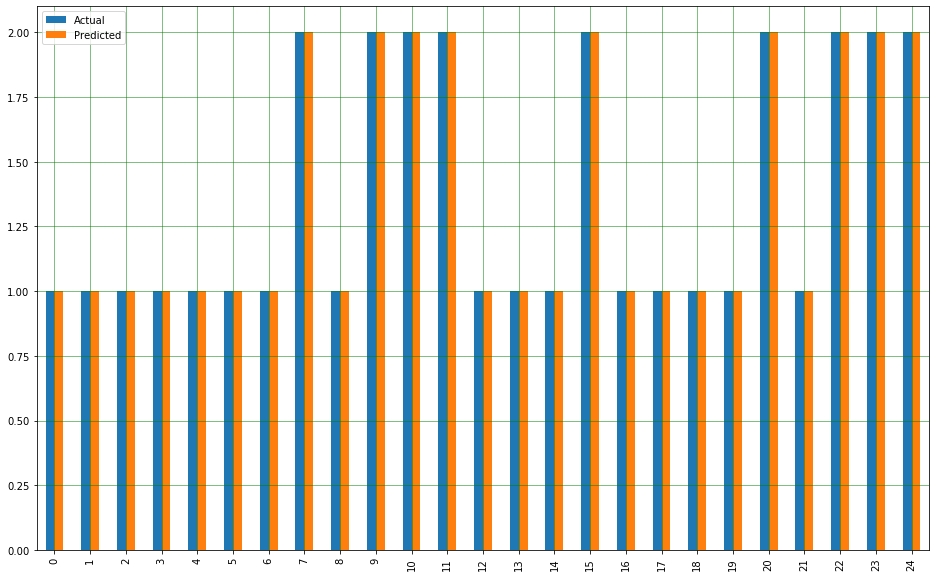

In [358]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Issue
The wierd thing is that when i use get_dummies the model is predicting with 100% accuracy if a mushroom is poisenous or not based on Odor or gill size. So i will try another method. Here i manully reshape the data to create X and Y instead of using get_dummies

In [359]:
x = myDf['Odor'].values.reshape(-1,1)
y = myDf['Poisonous'].values.reshape(-1,1)

In [360]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6498, 1)
(6498, 1)
(1625, 1)
(1625, 1)


In [361]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print('----------------------')
print(regressor.coef_)

[1.60404838]
----------------------
[[-0.02116924]]


In [362]:
y_pred = regressor.predict(X_test)

y_test = np.array(list(y_test))
y_pred = np.array(y_pred)

print(y_test)
print(y_pred)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()


[[1]
 [1]
 [1]
 ...
 [2]
 [1]
 [1]]
[[1.45586374]
 [1.45586374]
 [1.58287915]
 ...
 [1.51937144]
 [1.56170991]
 [1.45586374]]


,Actual,Predicted
0,1,1.455864
1,1,1.455864
2,1,1.582879
3,1,1.455864
4,1,1.582879


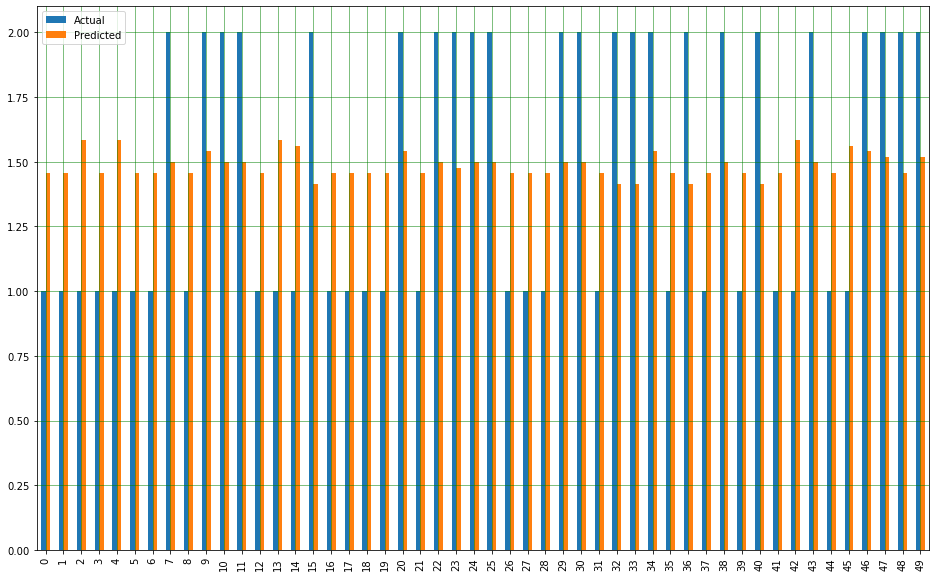

In [363]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Outcome. It does not look like odor is very accurate at predicting if a mushroom is poisonous. It usually gets it within half a point. This is similar to the outcome displayed in the first scatter plot. Now lets try Gill Size. 

In [364]:
x = myDf['Gill-Size'].values.reshape(-1,1)
y = myDf['Poisonous'].values.reshape(-1,1)

In [365]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6498, 1)
(6498, 1)
(1625, 1)
(1625, 1)


In [366]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print('----------------------')
print(regressor.coef_)

[0.71587329]
----------------------
[[0.58253372]]


In [367]:
y_pred = regressor.predict(X_test)

y_test = np.array(list(y_test))
y_pred = np.array(y_pred)

print(y_test)
print(y_pred)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()


[[1]
 [1]
 [1]
 ...
 [2]
 [1]
 [1]]
[[1.298407  ]
 [1.298407  ]
 [1.298407  ]
 ...
 [1.88094072]
 [1.298407  ]
 [1.298407  ]]


,Actual,Predicted
0,1,1.298407
1,1,1.298407
2,1,1.298407
3,1,1.298407
4,1,1.298407


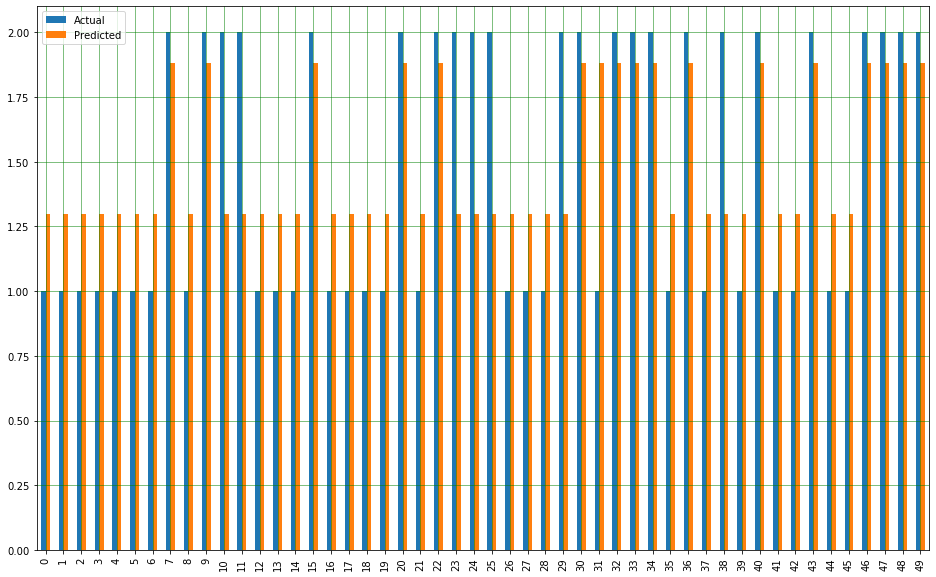

In [368]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

## Outcome. 

### It looks like Gill Size is a better predictor of if the mushroom is poisenous. It is usually accurate within a quarter of a point. Whats interesting to note is that Gill-Size predicts poisenous mushrooms within .25 of point and edible within .5 of a point usually.

My nexts steps would be to combine several charectaristics together to see which would be the best blend to predict if it poisonous or not. 